In [9]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [21]:
dataset_path = '/content/Prodigy_01'
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques -p "{dataset_path}"
!unzip -q "{dataset_path}/house-prices-advanced-regression-techniques.zip" -d "{dataset_path}"

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 100MB/s]


In [29]:
# @title imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer


In [23]:
# @title acquiring data files
train_data = pd.read_csv('/content/Prodigy_01/train.csv')
test_data = pd.read_csv('/content/Prodigy_01/test.csv')

In [24]:
# @title data analysis
print(train_data)
# Check for missing values
print(train_data.isnull().sum())
train_data.describe()

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
#@title Extract features (X) and target variable (y) from the training set
X_train = train_data[['PoolArea', 'WoodDeckSF', 'LotArea', 'MasVnrArea', 'GarageArea', 'TotalBsmtSF', 'FullBath','BedroomAbvGr']]
y_train = train_data['SalePrice']

# Extract features (X) from the test set
X_test = test_data[['PoolArea', 'WoodDeckSF', 'LotArea', 'MasVnrArea', 'GarageArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath']]


In [37]:
#@title handling missing values
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Separate numeric and non-numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Create transformers for numeric and non-numeric columns
numeric_transformer = SimpleImputer(strategy='mean')
non_numeric_transformer = SimpleImputer(strategy='most_frequent')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
# Drop rows with missing values
train_data = train_data.dropna()
missing_values = train_data.isnull().sum()
total_rows = train_data.shape[0]
missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': (missing_values / total_rows) * 100
})
missing_info
columns_with_missing_values = missing_info[missing_info['Missing Values'] > 0]
print("\nColumns with Missing Values Train_set:")
columns_with_missing_values



Columns with Missing Values Train_set:


,Column,Missing Values,Percentage


In [38]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [45]:
#@title training the model & evaluation matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the linear regression model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'Mean Absolute Error on Validation Set: {mae}')
print(f'R-squared Score on Validation Set: {r2}')


Mean Squared Error on Validation Set: 2364616522.2712693
Mean Absolute Error on Validation Set: 31076.49805360246
R-squared Score on Validation Set: 0.6917189102002448


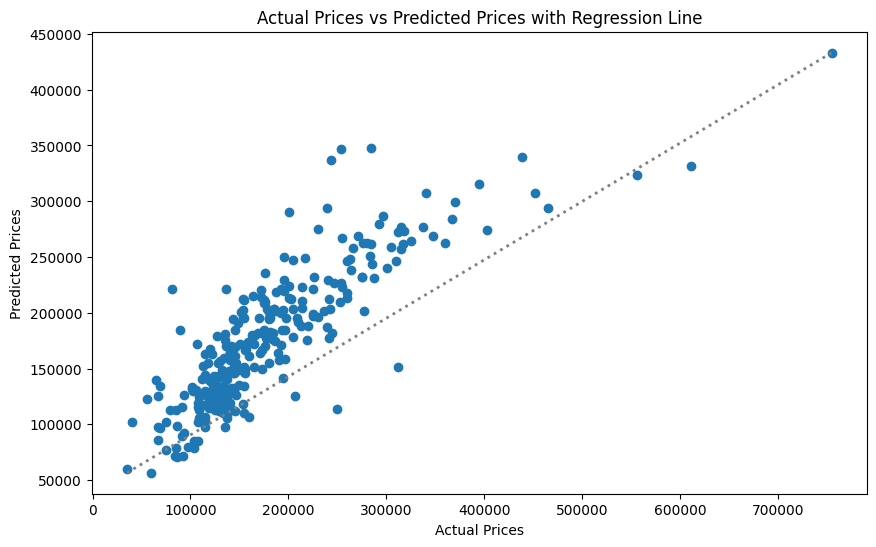

In [53]:
#@title Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val_pred), max(y_val_pred)], color='gray', linestyle=':', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()